## Udemy Courses

#### Description

This dataset contains 3,682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) in 12 columns taken from Udemy.
Udemy is a massive online open course (MOOC) platform that offers both free and paid courses. Anybody can create a course, a business model by which allowed Udemy to have hundreds of thousands of courses.
This version modifies column names, removes empty columns and aggregates everything into a single csv file for ease of use.

#### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Dataset

In [3]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


#### Checking size of the data

In [3]:
df.shape

(3678, 12)

#### Descriptive Statistics

In [4]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


#### Checking missing values

In [5]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

There are no missing values in the data

#### Removing duplicates from dataset

In [4]:
dfd = df         #creating copy of dataset
dfd.drop_duplicates(subset = "course_id",keep = False, inplace = True)
dfd

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


#### Renaming the course name

In [5]:
result = dfd.replace(to_replace = ['Ultimate Investment Banking Course', 'Angular 4: From Theory to Practice & FREE E-Book'], value = ['Banking Course', 'Angular 4'])
result           #row which are changed -  0 and 2698

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [6]:
df['course_id'].is_unique

True

In [7]:
df = df.set_index('course_id')
df.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


#### Seperating numeric columns

In [8]:
df_num = df.drop(["course_id", "course_title", "url", "is_paid", "level", "published_timestamp", "subject"], axis = 1)
df_num.head()

,price,num_subscribers,num_reviews,num_lectures,content_duration
0,200,2147,23,51,1.5
1,75,2792,923,274,39.0
2,45,2174,74,51,2.5
3,95,2451,11,36,3.0
4,200,1276,45,26,2.0


#### Find average, min, max values of all numeric columns

In [9]:
#average value of columns
df_num.mean()

price                 66.156574
num_subscribers     3184.001637
num_reviews          156.484179
num_lectures          40.171849
content_duration       4.100700
dtype: float64

In [10]:
#minimum value of columns
df_num.min()

price               0.0
num_subscribers     0.0
num_reviews         0.0
num_lectures        0.0
content_duration    0.0
dtype: float64

In [11]:
#maximum value of columns
df_num.max()

price                  200.0
num_subscribers     268923.0
num_reviews          27445.0
num_lectures           779.0
content_duration        78.5
dtype: float64

#### Find average, min, max values of all rows

In [12]:
#average value of all rows
df_num.mean(axis = 1)

0       484.5
1       820.6
2       469.3
3       519.2
4       309.8
        ...  
3673    235.4
3674     75.9
3675    154.7
3676     84.4
3677    200.8
Length: 3666, dtype: float64

In [13]:
#minimum value of all rows
df_num.min(axis = 1)

0        1.5
1       39.0
2        2.5
3        3.0
4        2.0
        ... 
3673     2.0
3674     3.0
3675     3.5
3676     3.0
3677     2.0
Length: 3666, dtype: float64

In [14]:
#maximum value of all rows
df_num.max(axis = 1)

0       2147.0
1       2792.0
2       2174.0
3       2451.0
4       1276.0
         ...  
3673    1040.0
3674     306.0
3675     513.0
3676     300.0
3677     901.0
Length: 3666, dtype: float64

#### Find the unique values of each column

In [15]:
for col in df:
    print(df[col].unique())

[1070968 1113822 1006314 ...  635248  905096  297602]
['Ultimate Investment Banking Course'
 'Complete GST Course & Certification - Grow Your CA Practice'
 'Financial Modeling for Business Analysts and Consultants' ...
 'Learn and Build using Polymer'
 'CSS Animations: Create Amazing Effects on Your Website'
 "Using MODX CMS to Build Websites: A Beginner's Guide"]
['https://www.udemy.com/ultimate-investment-banking-course/'
 'https://www.udemy.com/goods-and-services-tax/'
 'https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/'
 ... 'https://www.udemy.com/learn-and-build-using-polymer/'
 'https://www.udemy.com/css-animations-create-amazing-effects-on-your-website/'
 'https://www.udemy.com/using-modx-cms-to-build-websites-a-beginners-guide/']
[ True False]
[200  75  45  95 150  65 195  30  20  50 175 140 115 190 125  60 145 105
 155 185 180 120  25 160  40   0 100  90  35  80  70  55 165 130  85 170
 110 135]
[2147 2792 2174 ...  555  436  901]
[   23   923    

### Using lambda and map function

In [16]:
#using lambda and map function

price_list = df["price"].tolist()

final_price_list = list(map(lambda x: x*2, price_list))       #doubling the price

dfd['price'] = final_price_list      #changing the price from new price list into dataframe
dfd

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,400,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,150,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,90,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,190,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,400,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,200,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,50,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,80,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,100,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


### Qcut as a “Quantile-based discretization function.” 
Qcut tries to divide up the underlying data into equal sized bins

In [17]:
pd.qcut(df['price'], q=4)        #q=4 means creating 4 bins of equal size which means
                                 # it is dividing the price into four equal intervals

0       (190.0, 400.0]
1        (90.0, 190.0]
2         (40.0, 90.0]
3        (90.0, 190.0]
4       (190.0, 400.0]
             ...      
3673    (190.0, 400.0]
3674      (40.0, 90.0]
3675      (40.0, 90.0]
3676     (90.0, 190.0]
3677      (40.0, 90.0]
Name: price, Length: 3666, dtype: category
Categories (4, interval[float64]): [(-0.001, 40.0] < (40.0, 90.0] < (90.0, 190.0] < (190.0, 400.0]]

In [18]:
pd.qcut(df['num_subscribers'], q=7)     #it is dividing the num_subscribers into 7 equal intervals

0       (2146.0, 5092.429]
1       (2146.0, 5092.429]
2       (2146.0, 5092.429]
3       (2146.0, 5092.429]
4       (1200.286, 2146.0]
               ...        
3673     (578.0, 1200.286]
3674      (168.143, 578.0]
3675      (168.143, 578.0]
3676      (168.143, 578.0]
3677     (578.0, 1200.286]
Name: num_subscribers, Length: 3666, dtype: category
Categories (7, interval[float64]): [(-0.001, 30.0] < (30.0, 168.143] < (168.143, 578.0] < (578.0, 1200.286] < (1200.286, 2146.0] < (2146.0, 5092.429] < (5092.429, 268923.0]]

## Questions

### - Tell the course id and course title of the courses which has intermediate level and price 200 or above

In [19]:
df_sub = df.loc[((df['level'] == 'Intermediate Level') & (df['price'] >= 200)), ['course_id', 'course_title']]
df_sub

,course_id,course_title
4,1011058,How To Maximize Your Profits Trading Options
27,447362,Create Your Own Hedge Fund: Trade Stocks Like ...
35,434774,Options Trading Stocks: Proven Toolbox For Fin...
43,627540,Options Trading - How to Win with Weekly Options
52,411168,Trading Inside Bars - Master 1 Easy Pattern To...
...,...,...
3548,1039596,Build Complex Express Sites with Redis and Soc...
3563,830834,Quick learning jQuery web development
3576,1250934,Display and analyze GIS data on the web with L...
3592,976854,Spring 4 Mastercourse: Covers Annotation & XML...


### - Tell the course id, name and url of the course which has maximum number of lectures

In [20]:
max_lec = df['num_lectures'].max()
df_lec = df.loc[(df['num_lectures'] == max_lec), ['course_id', 'course_title', 'url']]
df_lec

,course_id,course_title,url
2707,79154,Back to School Web Development and Programming...,https://www.udemy.com/back-to-school-web-devel...


### - Find the number of courses of a particular subject

In [21]:
df[df["subject"] == "Business Finance"]['course_id'].count()

1187

There are 1187 courses on the subject of Business Finance

### - Find the number of courses of every subject

In [22]:
course_count = df.groupby(['subject'])['course_id'].count()
course_count

subject
Business Finance       1187
Graphic Design          601
Musical Instruments     680
Web Development        1198
Name: course_id, dtype: int64

Plotting a bar plot to show the number of courses which different subjects have -

Text(0.5, 1.0, 'Subject-wise Division of Courses')

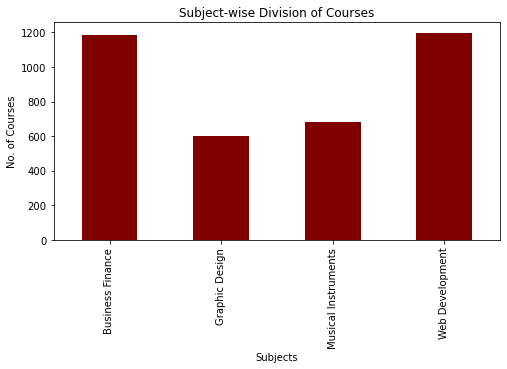

In [46]:
course_count.plot.bar(figsize = (8, 4), color = 'maroon')
plt.xlabel('Subjects')
plt.ylabel('No. of Courses')
plt.title('Subject-wise Division of Courses')

### - How many free courses are there for every subject

In [24]:
free_courses = df[df['price']==0].groupby(['subject'])['course_id'].count()
free_courses

subject
Business Finance        96
Graphic Design          35
Musical Instruments     46
Web Development        133
Name: course_id, dtype: int64

Plotting a graph to show the distribution of free courses among different subjects

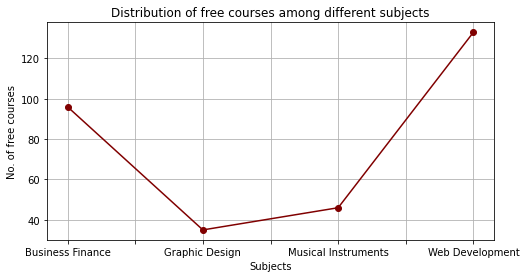

In [25]:
free_courses.plot.line(figsize = (8, 4), marker = 'o', color = 'maroon')
plt.xlabel('Subjects')
plt.ylabel('No. of free courses')
plt.title('Distribution of free courses among different subjects')
plt.grid()

### - Find the distribtuion of paid courses among different subjects

In [26]:
paid_courses = df[df['price']!=0].groupby(['subject'])['course_id'].count()
paid_courses

subject
Business Finance       1091
Graphic Design          566
Musical Instruments     634
Web Development        1065
Name: course_id, dtype: int64

Plotting a graph to show distribution of paid courses among different subjects

Text(0.5, 1.0, 'Distribution of paid courses across subjects')

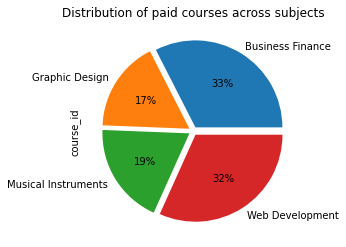

In [27]:
paid_courses.plot.pie(figsize = (8, 4), autopct = '%0.f%%', explode = [0.05, 0.05, 0.05, 0.05])
plt.title('Distribution of paid courses across subjects')

### - What are the most demanded subjects

In [28]:
dem = df.groupby(['subject'])['num_subscribers'].sum()
dem

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7894002
Name: num_subscribers, dtype: int64

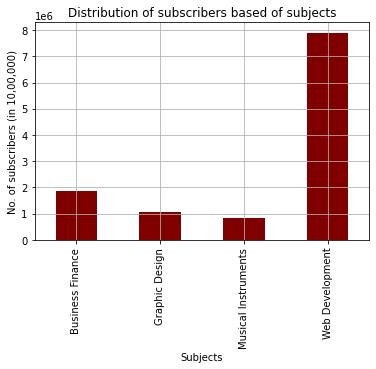

In [29]:
dem.plot.bar(color = 'maroon')
plt.xlabel('Subjects')
plt.ylabel('No. of subscribers (in 10,00,000)')
plt.title('Distribution of subscribers based of subjects')
plt.grid()

### - Year wise distribution of courses

In [30]:
#creating year column
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['year'] = df['published_timestamp'].dt.year

Text(0.5, 1.0, 'Year wise distribution of courses')

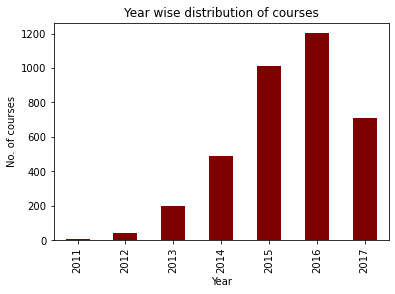

In [31]:
year_courses = df.groupby(['year'])['course_id'].count()
year_courses.plot.bar(color = 'maroon')
plt.xlabel('Year')
plt.ylabel('No. of courses')
plt.title('Year wise distribution of courses')

### - Distribution of subscribers across years

year
2011     119028
2012     555339
2013    1636868
2014    1930406
2015    3475324
2016    2966644
2017     988941
Name: num_subscribers, dtype: int64


Text(0.5, 1.0, 'Year wise distribution of no. of subscribers')

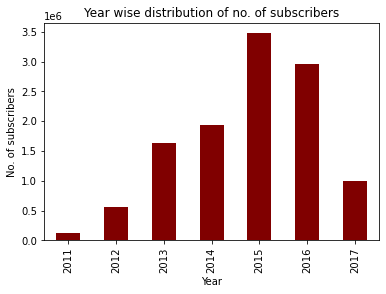

In [32]:
year_subs = df.groupby(['year'])['num_subscribers'].sum()
print(year_subs)

year_subs.plot.bar(color = 'maroon')
plt.xlabel('Year')
plt.ylabel('No. of subscribers')
plt.title('Year wise distribution of no. of subscribers')

### Distribution of subscribers across levels of courses

In [33]:
lev = df[df['level']!='All Levels'].groupby(['level'])['num_subscribers'].sum()
lev

level
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: num_subscribers, dtype: int64

Text(0.5, 1.0, 'Distribution of subscribers across course levels')

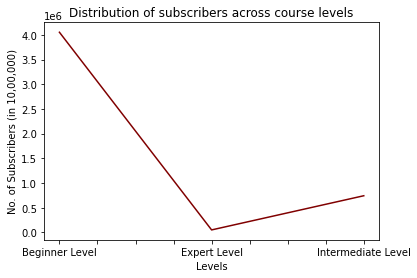

In [34]:
lev.plot.line(color = 'maroon')
plt.xlabel('Levels')
plt.ylabel('No. of Subscribers (in 10,00,000)')
plt.title('Distribution of subscribers across course levels')

### - Distribution of paid courses accross levels of courses

In [35]:
lev1 = df[df['level']!='All Levels'].groupby(['level'])['price'].count()
lev1

level
Beginner Level        1266
Expert Level            58
Intermediate Level     421
Name: price, dtype: int64

Text(0.5, 1.0, 'Distribution of paid courses across different levels')

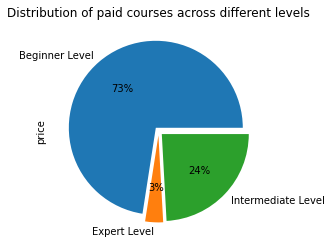

In [36]:
lev1.plot.pie(autopct = '%0.f%%', explode = [0.05, 0.05, 0.05])
plt.title('Distribution of paid courses across different levels')

### - What is the relationship between price and number of lectures of courses

In [37]:
data = df[['price', 'num_lectures']].corr()
data

,price,num_lectures
price,1.000000,0.329727
num_lectures,0.329727,1.000000


<AxesSubplot:>

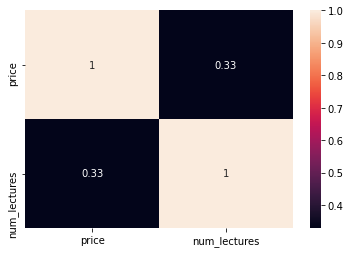

In [38]:
sns.heatmap(data, annot = True)

The number of lectures do not depend completely on the price.

### Relations between price, num of lecture, num of subscribers and content duration

<AxesSubplot:>

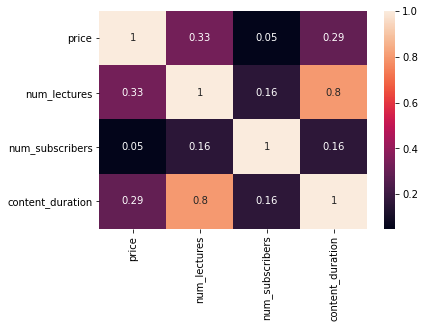

In [39]:
subset = df[['price', 'num_lectures', 'num_subscribers', 'content_duration']].corr()
sns.heatmap(subset, annot = True)

Following can be observed from the heatmap - 
- No. of subscribers have a very less dependency on the price of course
- No. of lectures and content duration are somewhat dependant on price
- No. of lectures don't make much difference on the no. of subscribers
- Content duration have a very little effect on no. of subscribers

### Top 10 most demanded paid courses

In [40]:
top_paid = df[df['price']!=0][['course_title', 'subject', 'num_subscribers']].sort_values(by = 'num_subscribers', ascending = False).head(10)
top_paid

,course_title,subject,num_subscribers
3230,The Web Developer Bootcamp,Web Development,121584
3232,The Complete Web Developer Course 2.0,Web Development,114512
2619,Learn Javascript & JQuery From Scratch,Web Development,84897
3247,JavaScript: Understanding the Weird Parts,Web Development,79612
1979,Pianoforall - Incredible New Way To Learn Pian...,Musical Instruments,75499
3204,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,73783
2701,Become a Web Developer from Scratch,Web Development,69186
3246,Learn and Understand AngularJS,Web Development,59361
3251,Learn and Understand NodeJS,Web Development,58208
2662,The Complete HTML & CSS Course - From Novice T...,Web Development,57422


Text(0.5, 1.0, 'No. of subscribers of top paid courses')

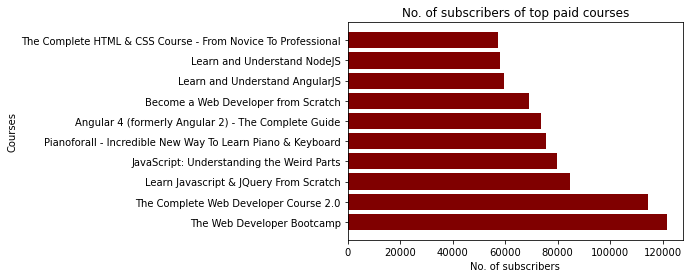

In [41]:
plt.barh(top_paid['course_title'], top_paid['num_subscribers'], color = 'maroon')
plt.xlabel('No. of subscribers')
plt.ylabel('Courses')
plt.title('No. of subscribers of top paid courses')

### - Top 10 most demanded free courses

In [42]:
top_free = df[df['price']==0][['course_title', 'subject', 'num_subscribers']].sort_values(by = 'num_subscribers', ascending = False).head(10)
top_free

,course_title,subject,num_subscribers
2827,Learn HTML5 Programming From Scratch,Web Development,268923
3032,Coding for Entrepreneurs Basic,Web Development,161029
2783,Build Your First Website in 1 Week with HTML5 ...,Web Development,120291
1896,Free Beginner Electric Guitar Lessons,Musical Instruments,101154
2589,Web Design for Web Developers: Build Beautiful...,Web Development,98867
3289,Practical PHP: Master the Basics and Code Dyna...,Web Development,83737
3665,Beginner Photoshop to HTML5 and CSS3,Web Development,73110
2782,Web Development By Doing: HTML / CSS From Scratch,Web Development,72932
3325,HTML and CSS for Beginners - Build a Website &...,Web Development,70773
492,Bitcoin or How I Learned to Stop Worrying and ...,Business Finance,65576


Text(0.5, 1.0, 'No. of subscribers of top free courses')

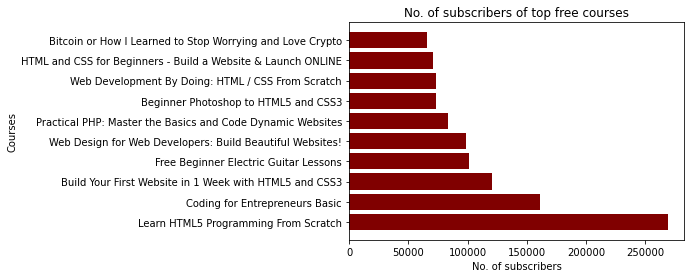

In [43]:
plt.barh(top_free['course_title'], top_free['num_subscribers'], color = 'maroon')
plt.xlabel('No. of subscribers')
plt.ylabel('Courses')
plt.title('No. of subscribers of top free courses')

### - Top 10 reviewed courses

In [44]:
top_reviewed = df[['course_title', 'subject', 'is_paid', 'num_reviews']].sort_values(by = 'num_reviews', ascending = False).head(10)
top_reviewed

,course_title,subject,is_paid,num_reviews
3230,The Web Developer Bootcamp,Web Development,True,27445
3232,The Complete Web Developer Course 2.0,Web Development,True,22412
3204,Angular 4 (formerly Angular 2) - The Complete ...,Web Development,True,19649
3247,JavaScript: Understanding the Weird Parts,Web Development,True,16976
3254,Modern React with Redux,Web Development,True,15117
3246,Learn and Understand AngularJS,Web Development,True,11580
3251,Learn and Understand NodeJS,Web Development,True,11123
2827,Learn HTML5 Programming From Scratch,Web Development,False,8629
3228,Angular 2 with TypeScript for Beginners: The P...,Web Development,True,8341
1979,Pianoforall - Incredible New Way To Learn Pian...,Musical Instruments,True,7676


Text(0.5, 1.0, 'No. of reviews of top reviewed courses')

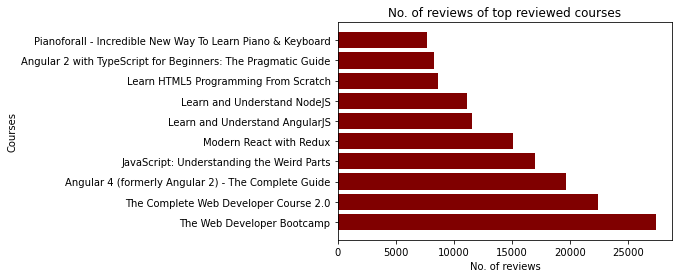

In [45]:
plt.barh(top_reviewed['course_title'], top_reviewed['num_reviews'], color = 'maroon')
plt.xlabel('No. of reviews')
plt.ylabel('Courses')
plt.title('No. of reviews of top reviewed courses')

### is_paid is a class variable  (true, false)

In [4]:
udf = df         #creating copy of dataset


In [6]:
X = udf.drop(["is_paid"], axis=1)
Y = udf.is_paid
X_Train, X_Test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle =True,stratify= Y)

(Stratified sampling aims at splitting a data set so that each split is similar with respect to something. In a classification setting, it is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.

In [7]:
X_Train

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2406,1104500,Instant Harmonica - play 12 bar blues Big Walt...,https://www.udemy.com/instant-harmonica-play-1...,40,31,2,14,All Levels,1.000000,2017-05-19T12:26:28Z,Musical Instruments
2292,815182,Saxophone Pro Series - You're going to love pr...,https://www.udemy.com/saxophone-pro-series/,50,119,4,32,All Levels,5.500000,2016-04-08T23:06:53Z,Musical Instruments
1487,464184,Expert Guide : Mastering Photoshop Smart Objec...,https://www.udemy.com/a-genius-guide-become-ph...,195,3360,26,16,All Levels,2.000000,2015-04-07T22:23:50Z,Graphic Design
2202,214794,Aprende a tocar ritmo pop en el piano y teclado,https://www.udemy.com/aprende-a-tocar-ritmo-po...,20,10,1,9,All Levels,0.716667,2014-05-16T17:03:56Z,Musical Instruments
1624,1275872,The Complete Adobe Spark Course,https://www.udemy.com/the-complete-adobe-spark...,150,0,0,29,All Levels,2.000000,2017-07-03T17:39:57Z,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...
1202,28556,Discover How to Draw and paint Comics,https://www.udemy.com/learn-to-draw-and-paint/,65,8901,424,85,All Levels,62.000000,2012-11-21T22:03:54Z,Graphic Design
1491,768366,Photoshop Fantastic! - The Comprehensive Guide...,https://www.udemy.com/photoshopfantastic/,20,2938,26,45,All Levels,6.000000,2016-04-06T05:29:30Z,Graphic Design
1910,552700,Your Second Course on Piano: Two Handed Playing,https://www.udemy.com/learn-to-play-piano-leve...,70,1018,12,22,Beginner Level,5.000000,2015-10-26T20:04:21Z,Musical Instruments
1429,1035402,Learn Adobe Illustrator CC - All Essentials In...,https://www.udemy.com/learn-adobe-illustrator-...,55,324,7,14,Beginner Level,1.000000,2017-03-01T00:56:31Z,Graphic Design


In [9]:
X_Test

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
145,317030,Learn how to double your Forex Trading Account...,https://www.udemy.com/learn-how-to-double-your...,60,2900,424,36,Intermediate Level,2.500000,2014-10-19T22:04:51Z,Business Finance
1668,681878,Devenez le king de l'illustration automobile,https://www.udemy.com/virtuel-car/,50,42,10,32,Beginner Level,4.500000,2015-12-09T16:49:20Z,Graphic Design
215,352150,Learn to Trade for Profit: Ten Most Profitable...,https://www.udemy.com/trading-stocks-successfu...,95,739,28,45,All Levels,2.000000,2014-12-23T15:28:09Z,Business Finance
1977,603902,Curso de Didgeridoo nivel principiante,https://www.udemy.com/curso-de-didgeridoo-nive...,50,0,0,31,Beginner Level,1.000000,2016-04-11T04:14:05Z,Musical Instruments
537,538560,Stocks For Beginners - A Guide To Investing,https://www.udemy.com/stocks-for-beginners-a-g...,20,64,15,14,Beginner Level,1.000000,2015-07-17T19:16:47Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
3522,388286,CoffeeScript: The Good Parts—Write Better java...,https://www.udemy.com/coffeescript/,50,2152,19,15,Beginner Level,2.500000,2015-01-13T04:50:51Z,Web Development
489,532836,How to Build a Massive Retirement Plan from Sc...,https://www.udemy.com/take-the-bulletproof-401...,200,1498,30,23,Beginner Level,2.000000,2015-06-22T23:04:23Z,Business Finance
249,851106,Investment Crowdfunding 101 (a.k.a Equity Crow...,https://www.udemy.com/crowdfund-investing-101-...,0,4607,181,11,Beginner Level,0.533333,2016-05-17T00:43:59Z,Business Finance
125,528784,Stock market Investing Encyclopedia: How to in...,https://www.udemy.com/stockmarket/,200,3143,11,39,Intermediate Level,3.000000,2015-11-10T22:55:53Z,Business Finance


In [10]:
y_train

2406    True
2292    True
1487    True
2202    True
1624    True
        ... 
1202    True
1491    True
1910    True
1429    True
310     True
Name: is_paid, Length: 2942, dtype: bool

In [11]:
y_test

145      True
1668     True
215      True
1977     True
537      True
        ...  
3522     True
489      True
249     False
125      True
299     False
Name: is_paid, Length: 736, dtype: bool